# Animations
In this notebook, we create animations of the particles in 2D and 3D space

In [14]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import matplotlib.gridspec as gridspec
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

import cartopy
from cartopy import geodesic 
import matplotlib

from matplotlib.animation import FuncAnimation, writers, PillowWriter, FFMpegWriter
from copy import copy
from glob import glob
from datetime import timedelta
from scipy.interpolate import interp1d
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [6]:
# ## Import data for bathymetry plots ###
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cartopy.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths_bathy = [d for d in shp_dict.keys()][::-1]
colors_bathy = sns.mpl_palette('cmo.ice_r', n_colors=8)
cmap_bathy = sns.mpl_palette('cmo.ice', n_colors=8, as_cmap=True)

In [18]:
path_flow = '/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/'
files = sorted(glob(path_flow + 'psy4v3r1-daily_2D_2019-01-*.nc'))

mesh_mask = xr.open_dataset('/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/coordinates.nc', decode_times=False)
flow = xr.open_dataset(files[10])


In [19]:
indices = {'lat': range(800, 1250), 'lon': range(3300, 4000)}
# indices = {'lat': range(200, 1700), 'lon': range(2300, 4321)}

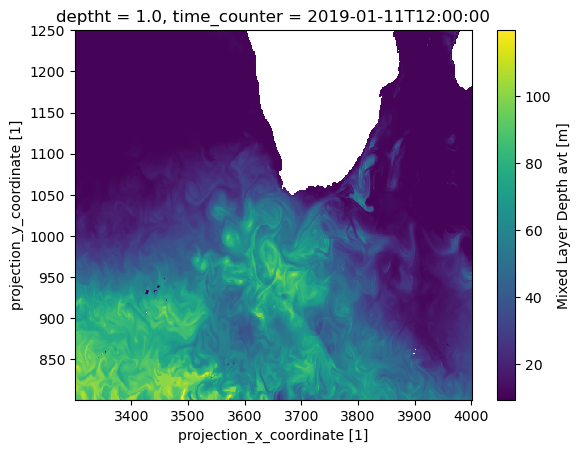

In [20]:
flow['somxlavt'][0, indices['lat'], indices['lon']].plot()

In [21]:
fields = np.zeros((len(Tfiles), len(indices['lat']), len(indices['lon'])))
time = np.zeros(len(files),dtype='datetime64[ns]')

indices = {'lat': range(800, 1250+1), 'lon': range(3300, 4000+1)}

lats = flow['nav_lat'][indices['lat'], indices['lon']].values
lons = flow['nav_lon'][indices['lat'], indices['lon']].values
lats -= lats[0,0] - lats[1,0]
lons -= lons[0,0] - lons[0,1]

indices = {'lat': range(800, 1250), 'lon': range(3300, 4000)}

NameError: name 'Tfiles' is not defined

In [22]:
for i, filename in enumerate(files):
    T = xr.open_dataset(filename)
    T_fields[i] = T['somxlavt'][0, indices['lat'], indices['lon']].values
    time[i] = T['time_counter'].values

NameError: name 'T_fields' is not defined

In [23]:
pset

NameError: name 'pset' is not defined

In [38]:
pset = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/hc13_2/hc13_400.zarr')
pset = pset.compute()

NameError: name 'times' is not defined

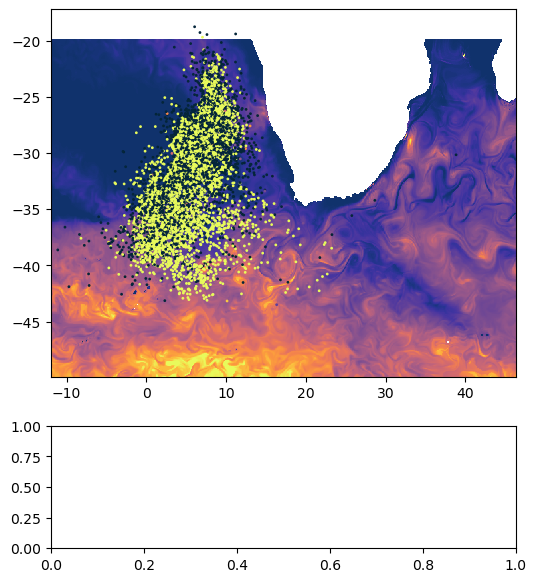

In [53]:
fig = plt.figure(figsize=(6,7))

gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2])

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

tracer = ax0.pcolormesh(lons, lats, T_fields[0], cmap='cmo.thermal', vmin=0, vmax=100)
t0 = 1000
particles = ax0.scatter(pset['lon'][:,t0], pset['lat'][:,t0], s=1, c=pset['z'][:,t0], cmap='cmo.thermal', vmin=0, vmax=500)

# diatoms_t = f(timerange_ns[0])
# pc = ax.pcolormesh(, , , cmap='cmo.algae', vmax=0.5, zorder=1, transform=ccrs.PlateCarree())

# ax1.coastlines()
# ax1.add_feature(cfeature.LAND, color='w',zorder=2)

# ax.scatter([0.03,0.03],[0.03,0.08],color=plt.get_cmap('cmo.matter')(150),s=[np.max(sqrtsizes)*1000,np.min(sqrtsizes)*1000], zorder=5, transform=ax.transAxes)

# size_text0 = ax.text(0.05, 0.05,'1 mm',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=13, color=plt.get_cmap('cmo.matter')(150)) # Initialise time ticker
# size_text1 = ax.text(0.05, 0.1,'10 um',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=13, color=plt.get_cmap('cmo.matter')(150)) # Initialise time ticker

time_id = np.where(np.logical_and(times >= timerange[0],times < timerange[1])) # All trajectory data for a single day

# vmax=2000
# scatter = ax.scatter(lons[time_id].T,lats[time_id].T,c=depths[time_id].T,cmap='cmo.matter',marker='o',s=sqrtsizes*1000,linewidths=0.3, transform=ccrs.PlateCarree(),zorder=4,vmin=0,vmax=vmax)


# time_text = ax.text(0.03, 0.96,'time',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=14, bbox={'facecolor':'w', 'alpha':0.7, 'pad':5}, zorder=3) # Initialise time ticker

# ## Depth colorbar
# CB0 = plt.colorbar(scatter, cax=ax0,extend='max', orientation='horizontal')
# CB0.set_label('Depth [m]', fontsize=15)
# ax0.tick_params(labelsize=13)

## Algae colorbar
# ax1.axis('off')
bar_ax0 = fig.add_axes([0.2, 0.28, 0.6, 0.02])
bar_ax1 = fig.add_axes([0.2, 0.15, 0.6, 0.02])
fig.colorbar(tracer, cax=bar_ax0, orientation='horizontal', label='Mixed Layer Depth [m]', extend='max')
fig.colorbar(particles, cax=bar_ax1, orientation='horizontal', label='Depth [m]', extend='max')

# def animate(i):
#     time_id = np.where(np.logical_and(times >= timerange[i],times < timerange[i+1]))
#     scatter.set_offsets(np.c_[lons[time_id].T, lats[time_id].T])
#     scatter.set_array(depths[time_id].T)
    
#     diatoms_t = f(timerange_ns[i])
#     pc.set_array(diatoms_t.ravel())
        
#     if i%2==0:
#         time_text.set_text(timedays[int(i/2)])  # Update the time
        
#     return time_text, scatter, pc,


# anim = FuncAnimation(fig, animate, frames = len(timerange)-10, interval=100, blit=True, repeat=True)

# # writergif = PillowWriter(fps=20, codec="libx264")
# # anim.save(region+'.gif', writer=writergif)

# plt.show()

NameError: name 'pset' is not defined

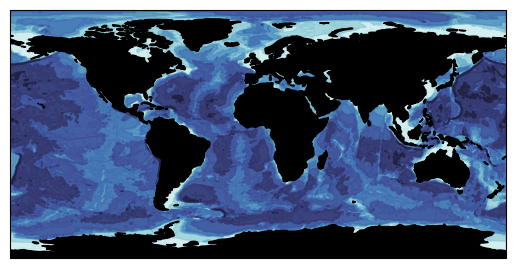

In [16]:
alpha= 0.6
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())

i = 0
for depth in depths_bathy[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),
                        crs=ccrs.PlateCarree(), color=colors_bathy[i], 
                        alpha=alpha)
    i += 1

ax.add_feature(cartopy.feature.NaturalEarthFeature(category='physical',
                                                    name='land', 
                                                    scale='110m'),
                                                    color='black')

ax.scatter(pset['lon'][:,t0], pset['lat'][:,t0], s=1, c=pset['z'][:,t0], cmap='cmo.thermal', vmin=0, vmax=500)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False


# Add custom colorbar
axi = fig.add_axes([0.910, 0.35, 0.025, 0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000, vmax=0)

boundaries_bathy = (-np.array(depths_bathy[:8]).astype(int)).tolist()[::-1]
ticks_bathy = -np.array(depths_bathy).astype(int)
matplotlib.colorbar.ColorbarBase(ax=axi, cmap=cmap_bathy, norm=norm,
                                        boundaries=boundaries_bathy,
                                        ticks=ticks_bathy,
                                        spacing='proportional',
                                        extend='neither',
                                        label='Depth (m)')

## Global Equatorial Pacific

<IPython.core.display.Javascript object>


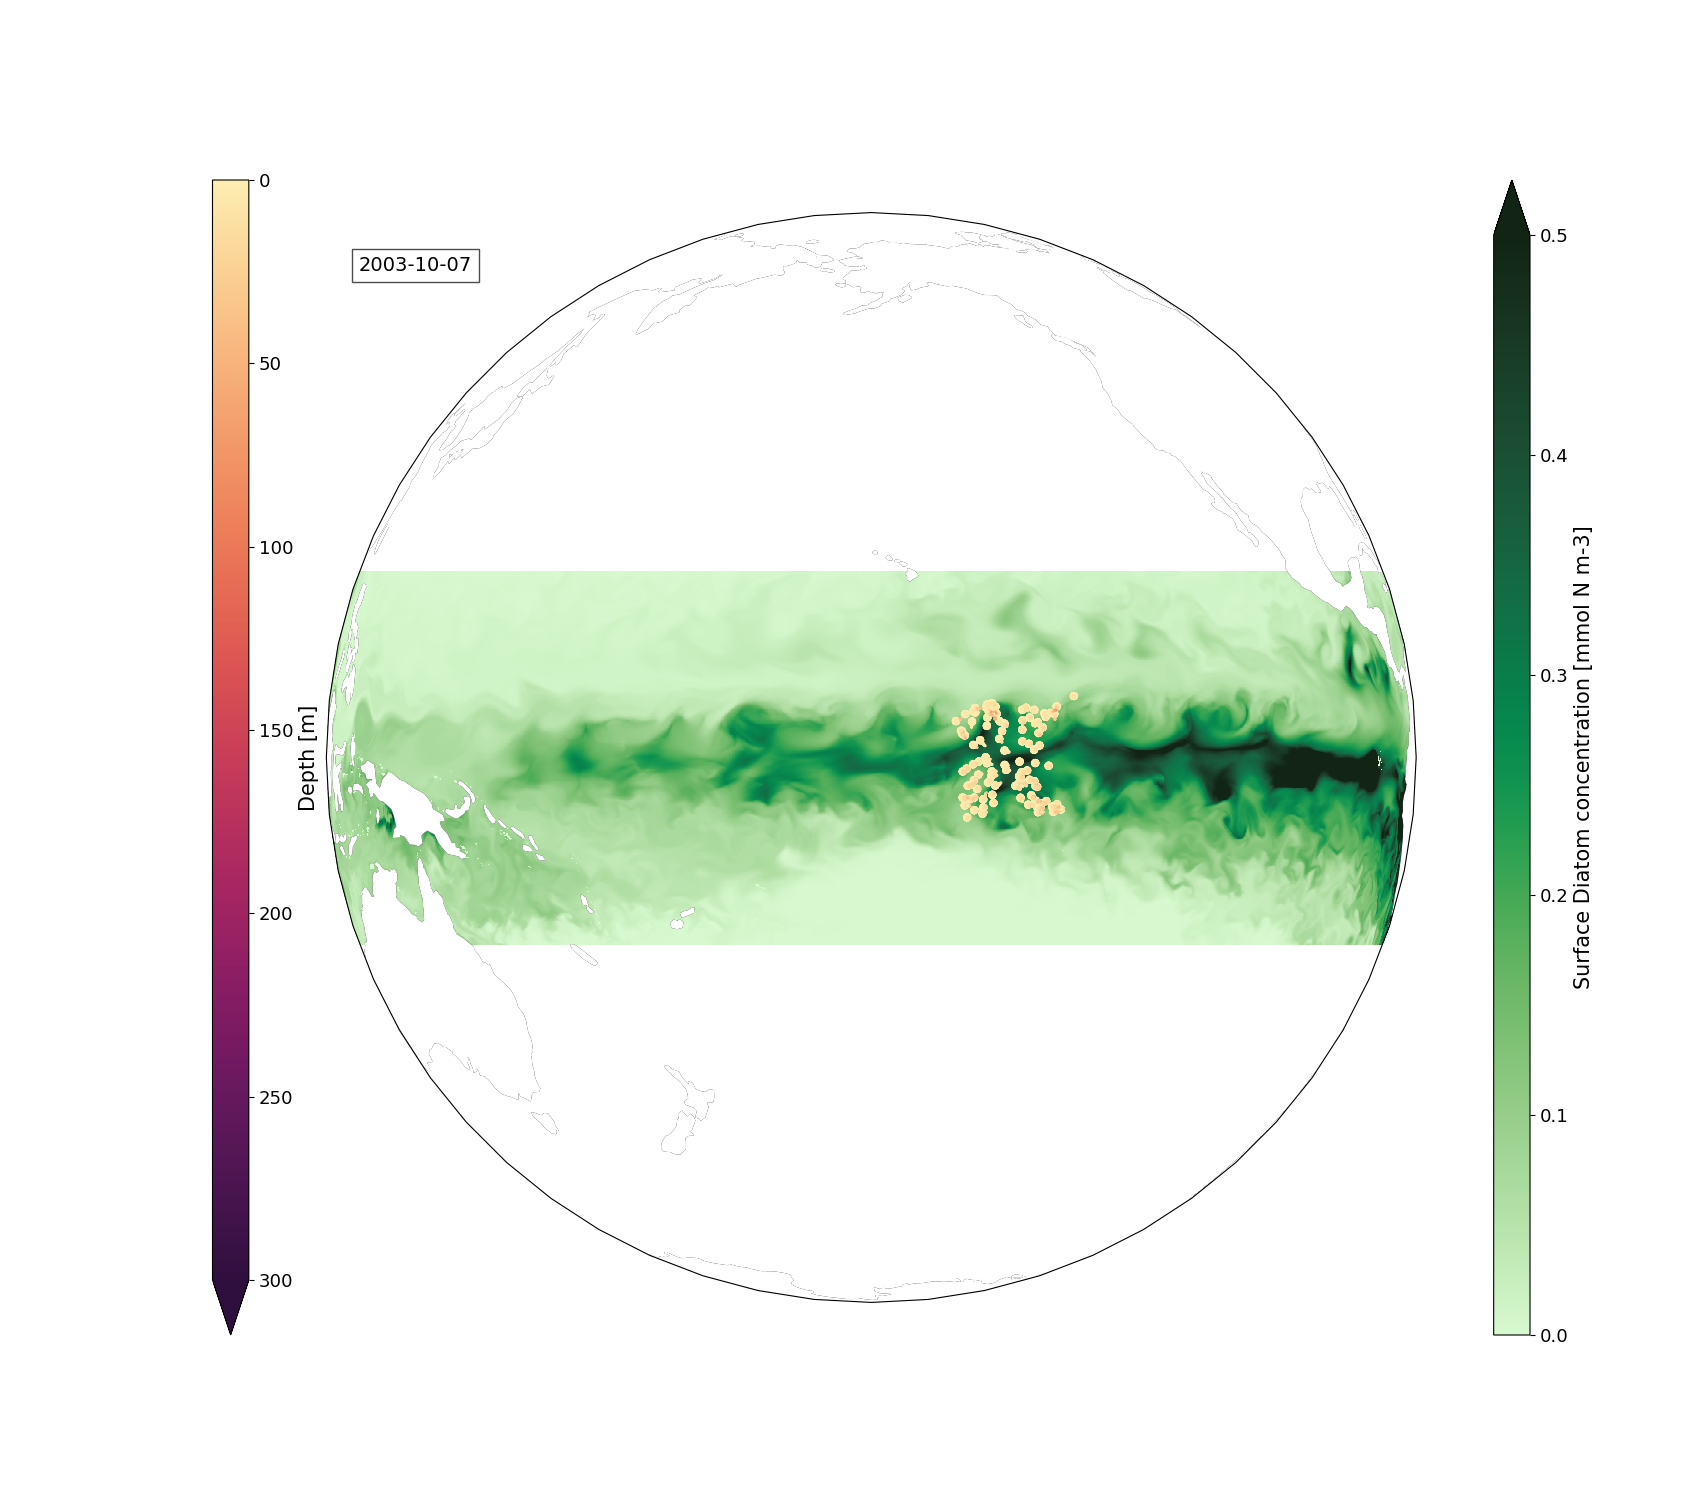

In [64]:
fig = plt.figure(figsize=(17,15))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 30, 1])

axcb0 = plt.subplot(gs[0])
axcb1 = plt.subplot(gs[2])
ax = plt.subplot(gs[1],projection=ccrs.Orthographic(central_longitude=-160))
ax.set_global()

diatoms_t = f(timerange_ns[0])
pc = ax.pcolormesh(mesh_mask['glamf'][0,jmin:jmax,imin:imax],mesh_mask['gphif'][0,jmin:jmax,imin:imax],diatoms_t, cmap='cmo.algae', vmax=0.5, zorder=1, transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.LAND, color='w',zorder=2)

time_id = np.where(np.logical_and(times >= timerange[0],times < timerange[1])) # All trajectory data for a single day

vmax=300
scatter = ax.scatter(lons[time_id].T,lats[time_id].T,c=depths[time_id].T,cmap='cmo.matter',marker='o',s=sqrtsizes*1000,linewidths=0.3, transform=ccrs.PlateCarree(),zorder=4,vmin=0,vmax=vmax)

time_text = ax.text(0.03, 0.96,'time',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=14, bbox={'facecolor':'w', 'alpha':0.7, 'pad':5}, zorder=3) # Initialise time ticker

## Depth colorbar
CB0 = plt.colorbar(scatter, cax=axcb0,extend='max')
CB0.set_label('Depth [m]', fontsize=15)
axcb0.tick_params(labelsize=13)
axcb0.invert_yaxis()

## Algae colorbar
CB1 = plt.colorbar(pc, cax=axcb1,extend='max')
CB1.set_label('Surface Diatom concentration [mmol N m-3]', fontsize=15)
axcb1.tick_params(labelsize=13)

def animate(i):
    time_id = np.where(np.logical_and(times >= timerange[i],times < timerange[i+1]))
    scatter.set_offsets(np.c_[lons[time_id].T, lats[time_id].T])
    scatter.set_array(depths[time_id].T)
    
    diatoms_t = f(timerange_ns[i])
    pc.set_array(diatoms_t.ravel())
        
    if i%2==0:
        time_text.set_text(timedays[int(i/2)])  # Update the time
        
    return scatter, pc, time_text,


anim = FuncAnimation(fig, animate, frames = len(timerange)-10, interval=100, blit=True, repeat=True)

# writergif = PillowWriter(fps=20, codec="libx264")
# anim.save(region+'.gif', writer=writergif)

plt.show()

## Global Southern Ocean

<IPython.core.display.Javascript object>


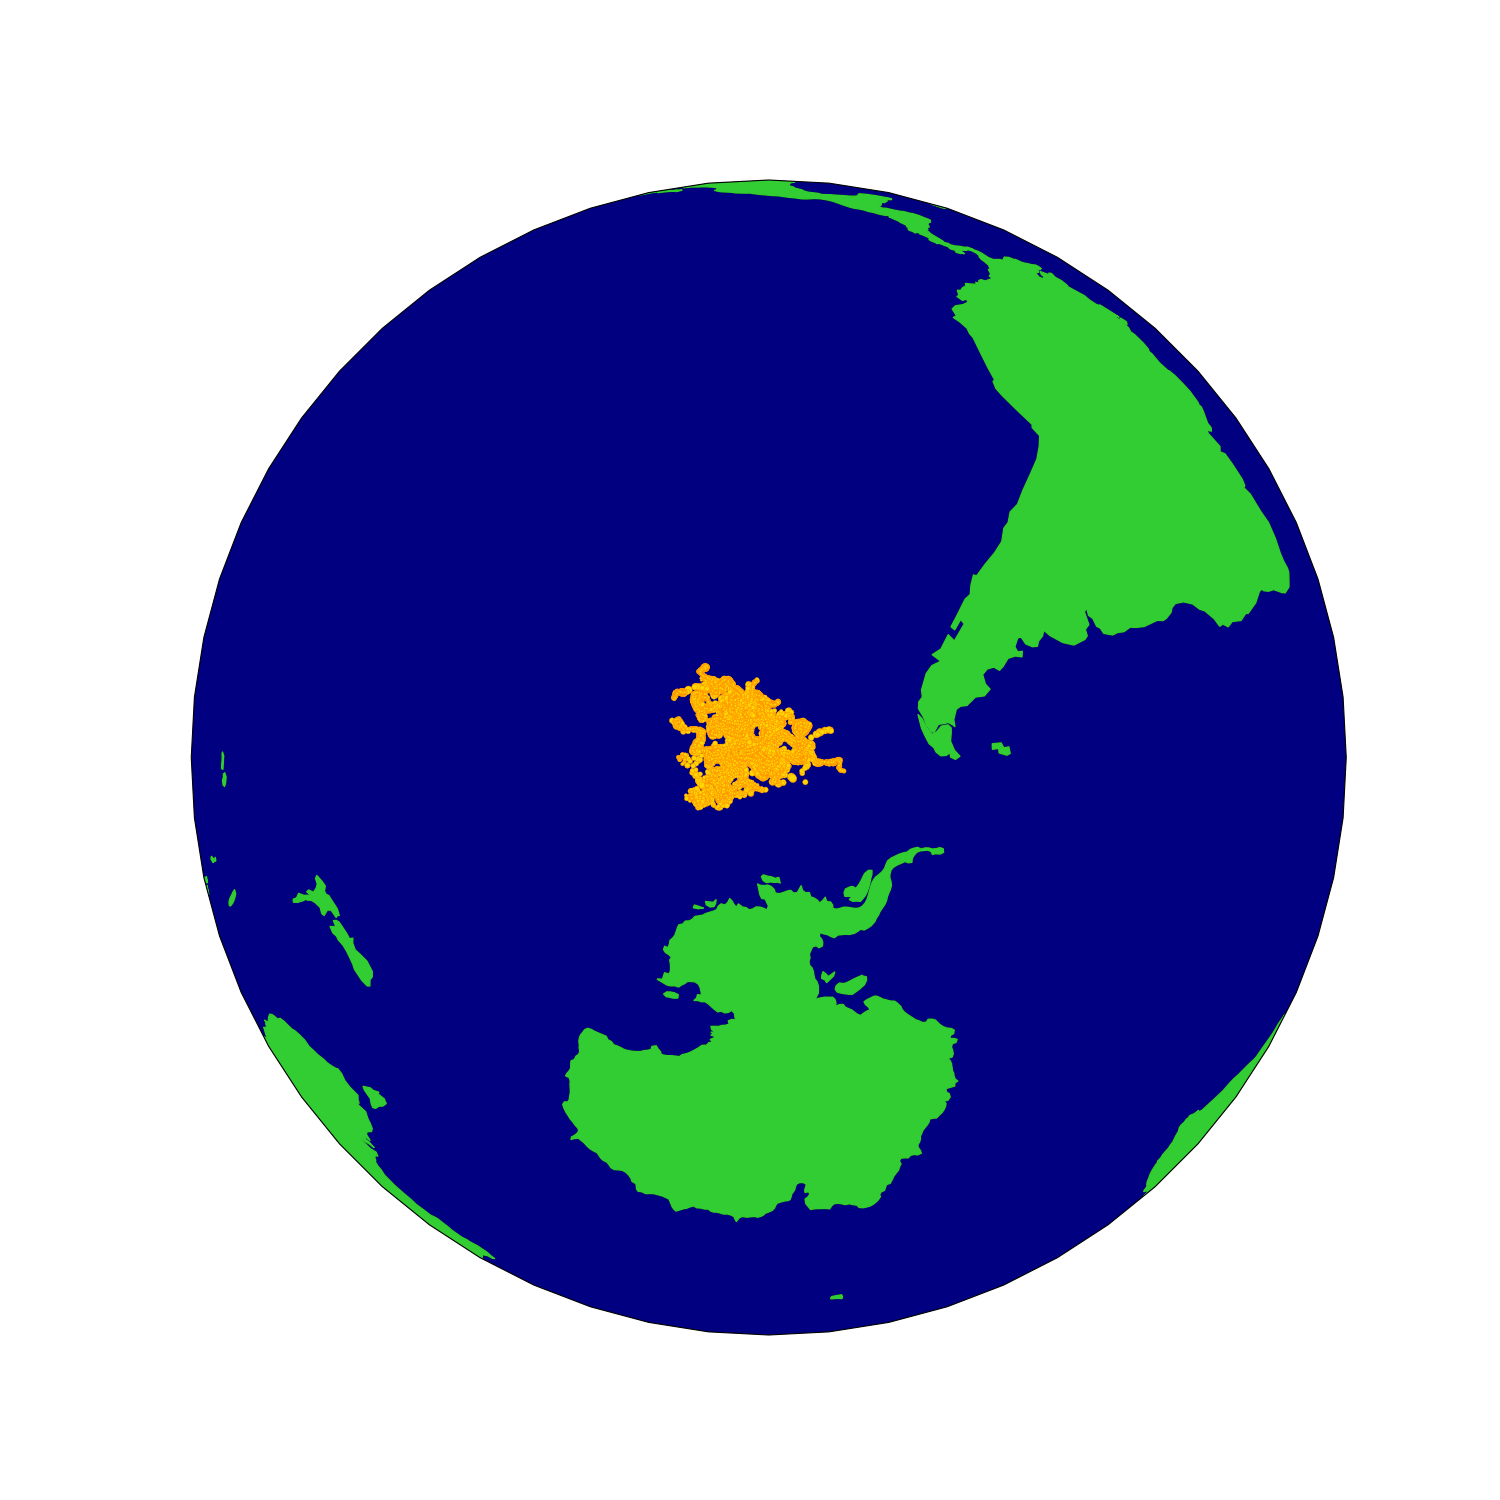

In [18]:
fig = plt.figure(figsize=(15,15))
# gs = gridspec.GridSpec(3, 1, height_ratios=[1, 18, 1])

# axcb0 = plt.subplot(gs[0])
# axcb1 = plt.subplot(gs[2])
# ax = plt.subplot(gs[1],projection=ccrs.Orthographic(central_longitude=180))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-100, central_latitude=-60))
ax.set_global()
# pc = ax.pcolormesh(mesh_mask['glamf'][0,jmin:jmax,imin:imax],mesh_mask['gphif'][0,jmin:jmax,imin:imax],diatoms[0,0], cmap='cmo.algae', vmax=0.5, zorder=1, transform=ccrs.PlateCarree())
ax.set_facecolor('navy')
ax.coastlines()
ax.add_feature(cfeature.LAND, color='limegreen',zorder=2)

# ax.scatter([0.03,0.03],[0.03,0.08],color=plt.get_cmap('cmo.matter')(150),s=[np.max(sqrtsizes)*1000,np.min(sqrtsizes)*1000], zorder=5, transform=ax.transAxes)

# size_text0 = ax.text(0.05, 0.05,'1 mm',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=13, color=plt.get_cmap('cmo.matter')(150)) # Initialise time ticker
# size_text1 = ax.text(0.05, 0.1,'10 um',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=13, color=plt.get_cmap('cmo.matter')(150)) # Initialise time ticker

time_id = np.where(np.logical_and(times >= timerange[0],times < timerange[1])) # All trajectory data for a single day

vmax=1000
scatter = ax.scatter(lons[time_id].T,lats[time_id].T,marker='o',s=sqrtsizes*1000,linewidths=0.3, transform=ccrs.PlateCarree(),zorder=4,color='gold', edgecolor='darkorange')#c=depths[time_id].T,cmap='cmo.matter',vmin=0,vmax=vmax)


# time_text = ax.text(0.03, 0.96,'time',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=14, bbox={'facecolor':'w', 'alpha':0.7, 'pad':5}, zorder=3) # Initialise time ticker

# ## Depth colorbar
# CB0 = plt.colorbar(scatter, cax=axcb0,extend='max', orientation='horizontal')
# CB0.set_label('Depth [m]', fontsize=15)
# axcb0.tick_params(labelsize=13)

# ## Algae colorbar
# CB1 = plt.colorbar(pc, cax=axcb1,extend='max', orientation='horizontal')
# CB1.set_label('Surface Diatom concentration [mmol N m-3]', fontsize=15)
# axcb1.tick_params(labelsize=13)

def animate(i):
    time_id = np.where(np.logical_and(times >= timerange[i],times < timerange[i+1]))
    scatter.set_offsets(np.c_[lons[time_id].T, lats[time_id].T])
#     scatter.set_array(depths[time_id].T)
    
#     if i%10==0:
#         pc.set_array(diatoms[int(i/10),int(i%10)].ravel())
        
#     if i%2==0:
#         time_text.set_text(timedays[int(i/2)])  # Update the time
        
    return scatter,# pc, #time_text,


anim = FuncAnimation(fig, animate, frames = len(timerange)-10, interval=100, blit=True, repeat=True)

# writergif = PillowWriter(fps=20, codec="libx264")
# anim.save(region+'.gif', writer=writergif)

plt.show()